# <font color="navy"> [기말고사]  - 고급통계실무 2021-2학기

<font color="blue"> 
    
- **아래의 문제에 답을 채워넣은 뒤 모든 결과물이 프린트 된 상태에서 `File>Download as>HTML(.html)` 형식으로 저장하여 업로드하세요. (압축하지 말고 업로드)**
    
- **시험 시간 중 Zoom 강의실에 접속하여 본인의 얼굴이 보이도록 세팅한 후 진행하도록 합니다.**
    
- **시험 시간 중 질문이 있는 사람은 Zoom 강의실의 비공개 채팅을 사용하여 질문하면 됩니다.**
- **문제에 따라서 원하는 학생은 종이에 손으로 답안을 작성하여 업로드 해도 됩니다. 단, 반드시 아래의 답안 란에 
    <font color=red> "답안을 별도로 업로드 하였음"  <font color=blue>이라고 표기하고 답안 종이에 문항번호를 명시해야 합니다. <font color=red> 압축하지 말고 개별 파일을 따로 업로드 하길 바랍니다.** 

In [18]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from PIL import Image

In [42]:
from numpy.random import multinomial
from numpy.random import dirichlet
from numpy.random import poisson
from numpy.random import gamma
import pymc3 as pm

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

1\. 한 도시의 교통사고 발생건수는 1일 평균 2, 분산 1을 가지고 있고 최근 5일간 사고 발생 수는 (1,1,2,2,3)으로 조사되었다. 

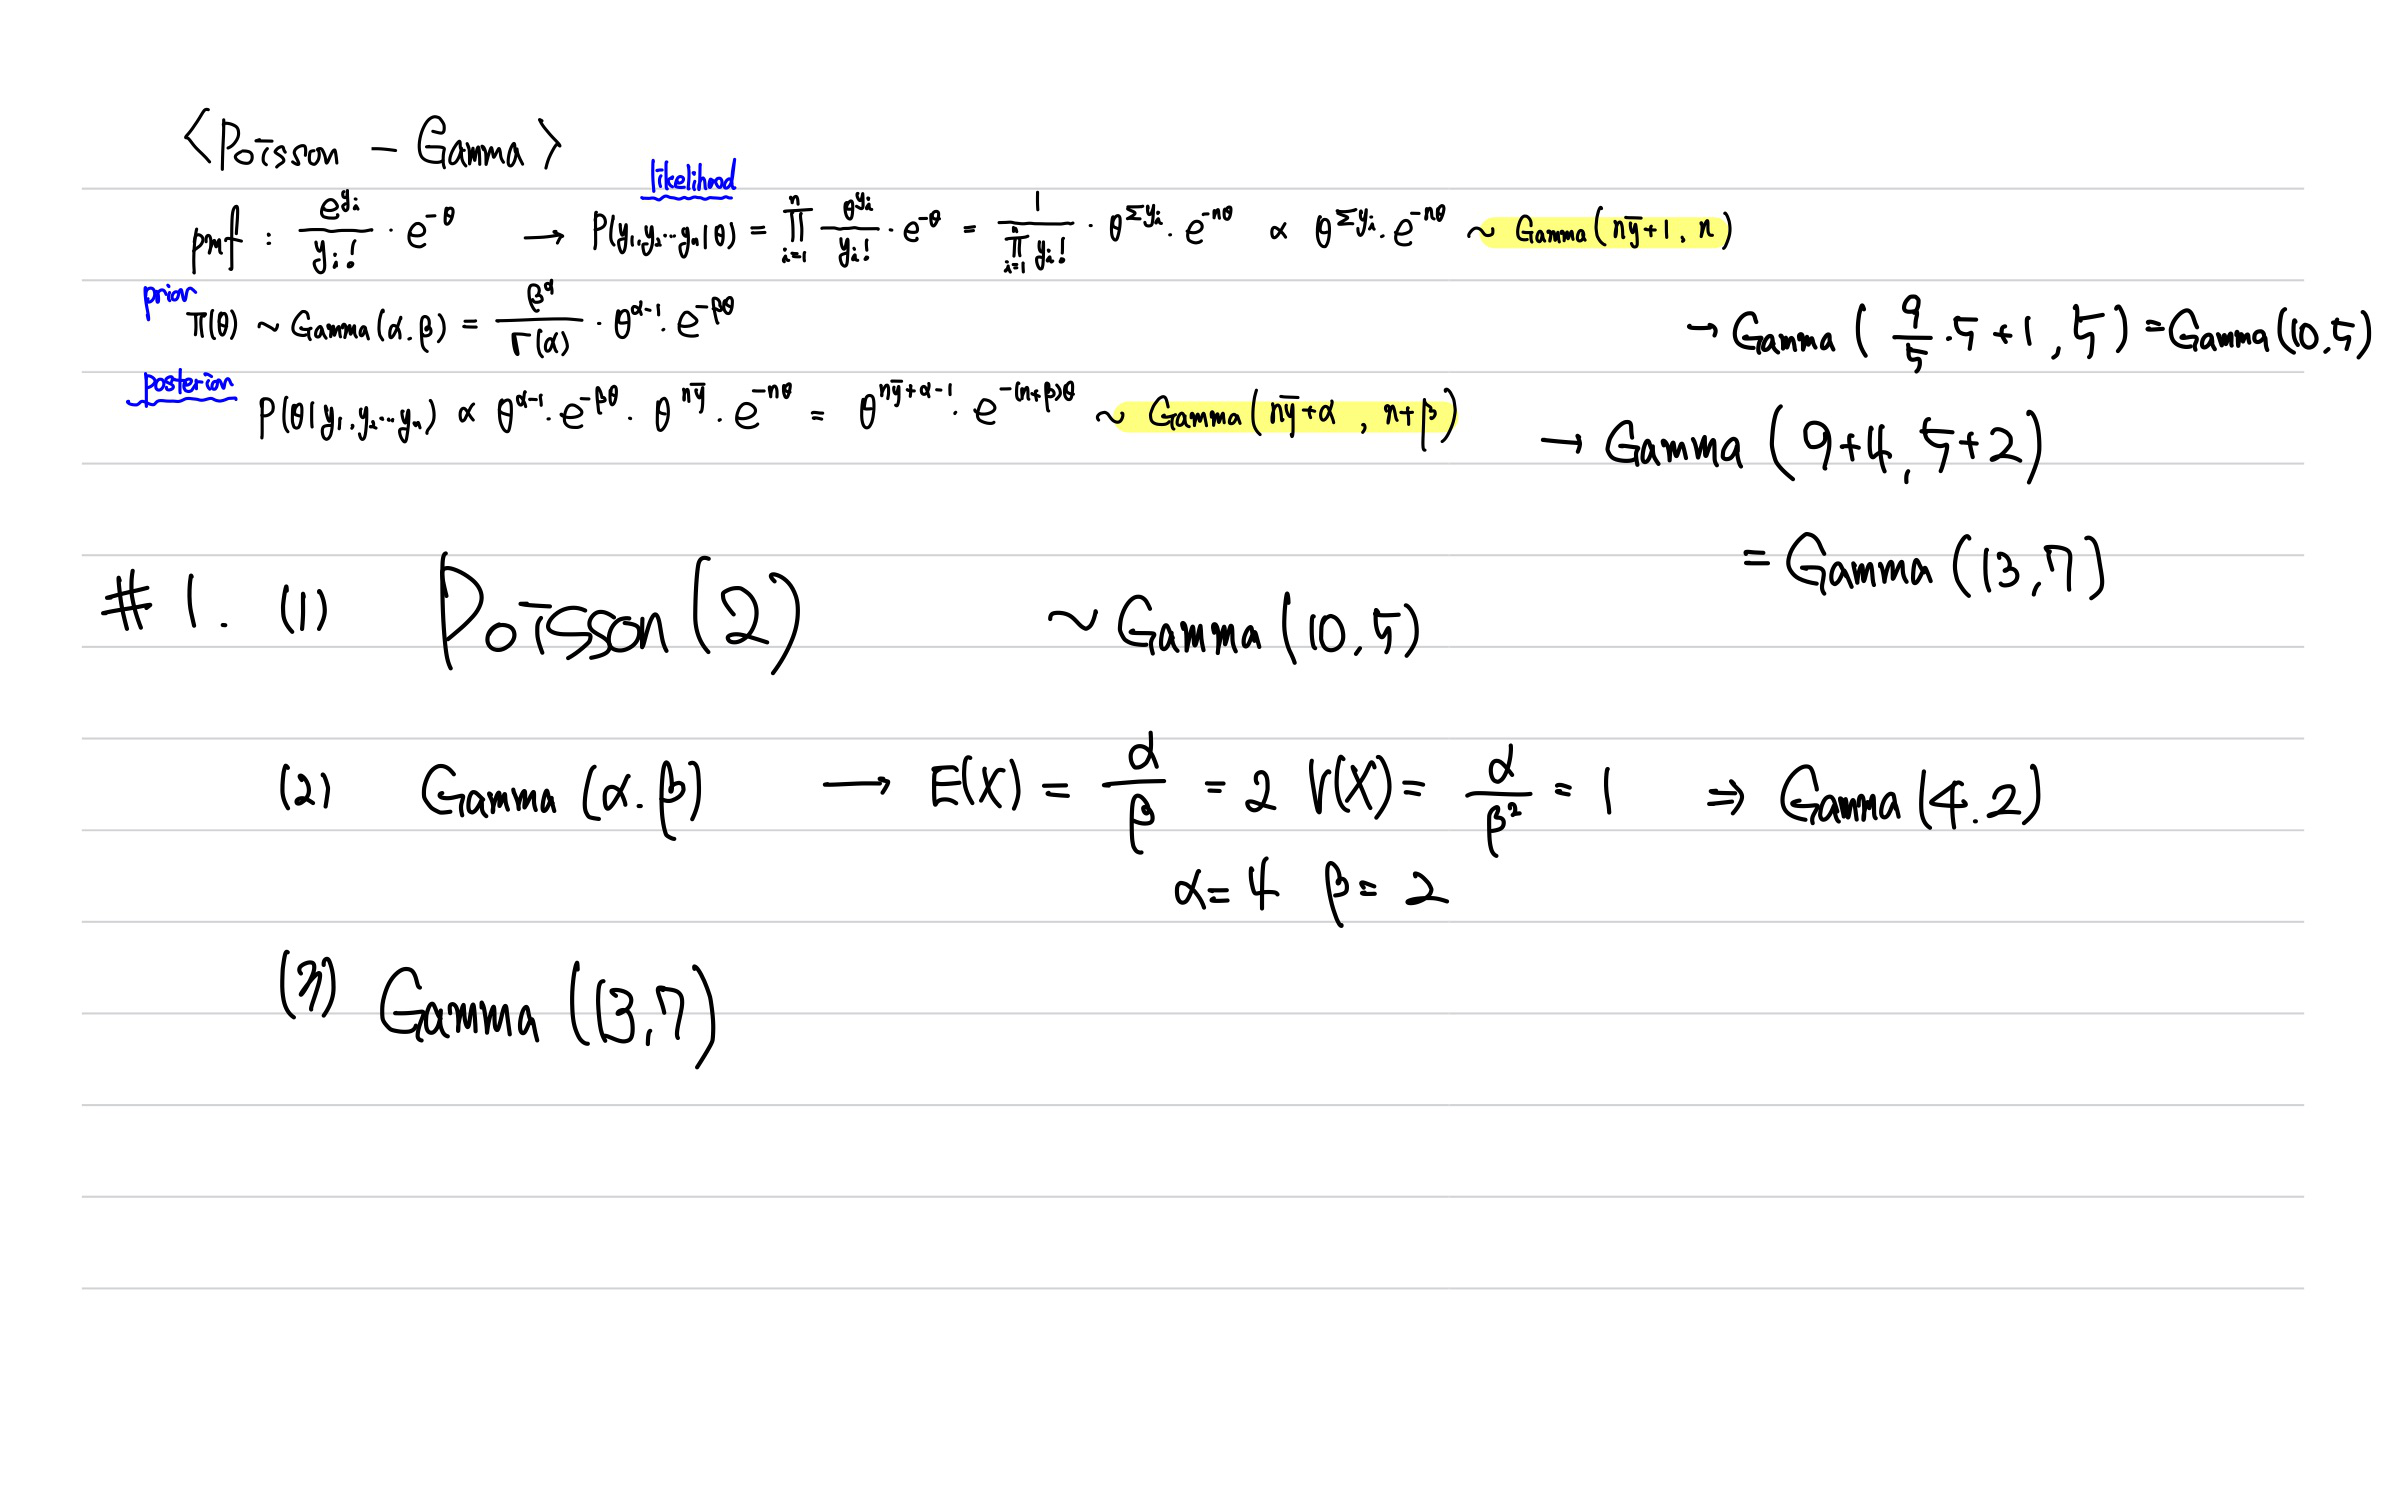

In [55]:
Image.open('Question1.jpg')

(1) [10 pts] 일 교통사고 발생건수가 $Poisson(\lambda)$를 따른다고 할 때, 위의 관측치에 대한 우도함수를 쓰시오. 

In [50]:
observations = np.array([1, 1, 2, 2, 3])

likelihood = poisson(observations)
print(likelihood)

[2 1 4 2 3]


(2) [10 pts]  위의 포아송 분포의 모수 $\lambda$에 대한 conjugate prior는 무엇인가? 사고건수가의 일 평균이 2, 분산이 1이라는 정보를 사용하여 conjugate prior의 모수, 즉 hyperparameter의 값을 정하시오. 

- 포아송 분포의 모수  𝜆 에 대한 conjugate prior는 Gamma 분포이다.

- 사고건수가의 일 평균이 2, 분산이 1이라는 정보를 사용하면 감마분포의 평균은 alpha/beta, 분산은 alpha/beta^2이므로, alpha=4, beta=2이다.  
- 사고건수가의 일 평균이 2, 분산이 1이라는 정보를 사용하여 conjugate prior의 모수, 즉 hyperparameter의 값 alpha=4, beta=2이다.  
- Gamma(4,2)

(3) [10 pts]  위의 (2)의 conjugate prior를 사용했을 때 posterior distribution을 명시하시오.

In [56]:
prior_alpha = 4
prior_beta = 2

posterior_samples = gamma((prior_alpha+observations.sum()), prior_beta+len(observations), size=10000)


(4) [10 pts]  아래의 loss 함수를 사용할 때 Bayes' risk를 최소화 시키는 추정치를 계산하시오.
$$
L \left( \lambda, \hat \lambda \right) = \left( \lambda - \hat \lambda \right)^2
$$


Squared error loss 함수를 사용할 때 Bayes' risk를 최소화 시키는 추정치 posterior mean을 이용하면 된다.

In [57]:
posterior_samples.mean()

91.29988127646249

2\. 한 통신사의 홈페이지의 통신요금제를  소개하는 페이지의 디자인을 개편하려고 한다. A 디자인과 B 디자인에 무작위로 선정된 방문자를 1000명씩 할당하여 아래의 요금제 중 어떤 것을 선택하는지 아래와 같이 기록하였다. 

|  월 통신요금 (단위: 천원)  | A 디자인   | B 디자인    |
|----|----|-----|
| 79 | 10 | 8   |
| 69 | 32 | 20  |
| 50 | 45 | 50  |
| 33 | 89 | 150 |
| 0 (가입하지 않음)  | 824    |   772  |
|Total | 1000|1000|


In [4]:
n_a = 1000
x79_a = 10
x69_a = 32
x50_a = 45
x33_a = 89
x0_a = 824

n_b = 1000
x79_b = 8
x69_b = 20
x50_b = 50
x33_b = 150
x0_b = 772

(1) [8 pts]  1000명 중 다섯 개의 각 요금제에 가입하는 사람 수를 $x_1, x_2, \ldots, x_5$라고 할 때, $(x_1, x_2, x_3, x_4, x_5)$가 따르는 분포를 Multinomial(1000; $p_1,p_2,\ldots, p_5$)로 가정하고 $p_1, p_2, \ldots, p_5$의 사전분포를 conjugate prior로 설정하고자 한다.  $p_1,p_2,\ldots, p_5$에 대한 사전정보가 전혀 없다면 conjugate prior의 hyperparameter를 어떻게 설정하는 것이 적당한가? 질문에 답하고 그 이유를 설명하시오.  

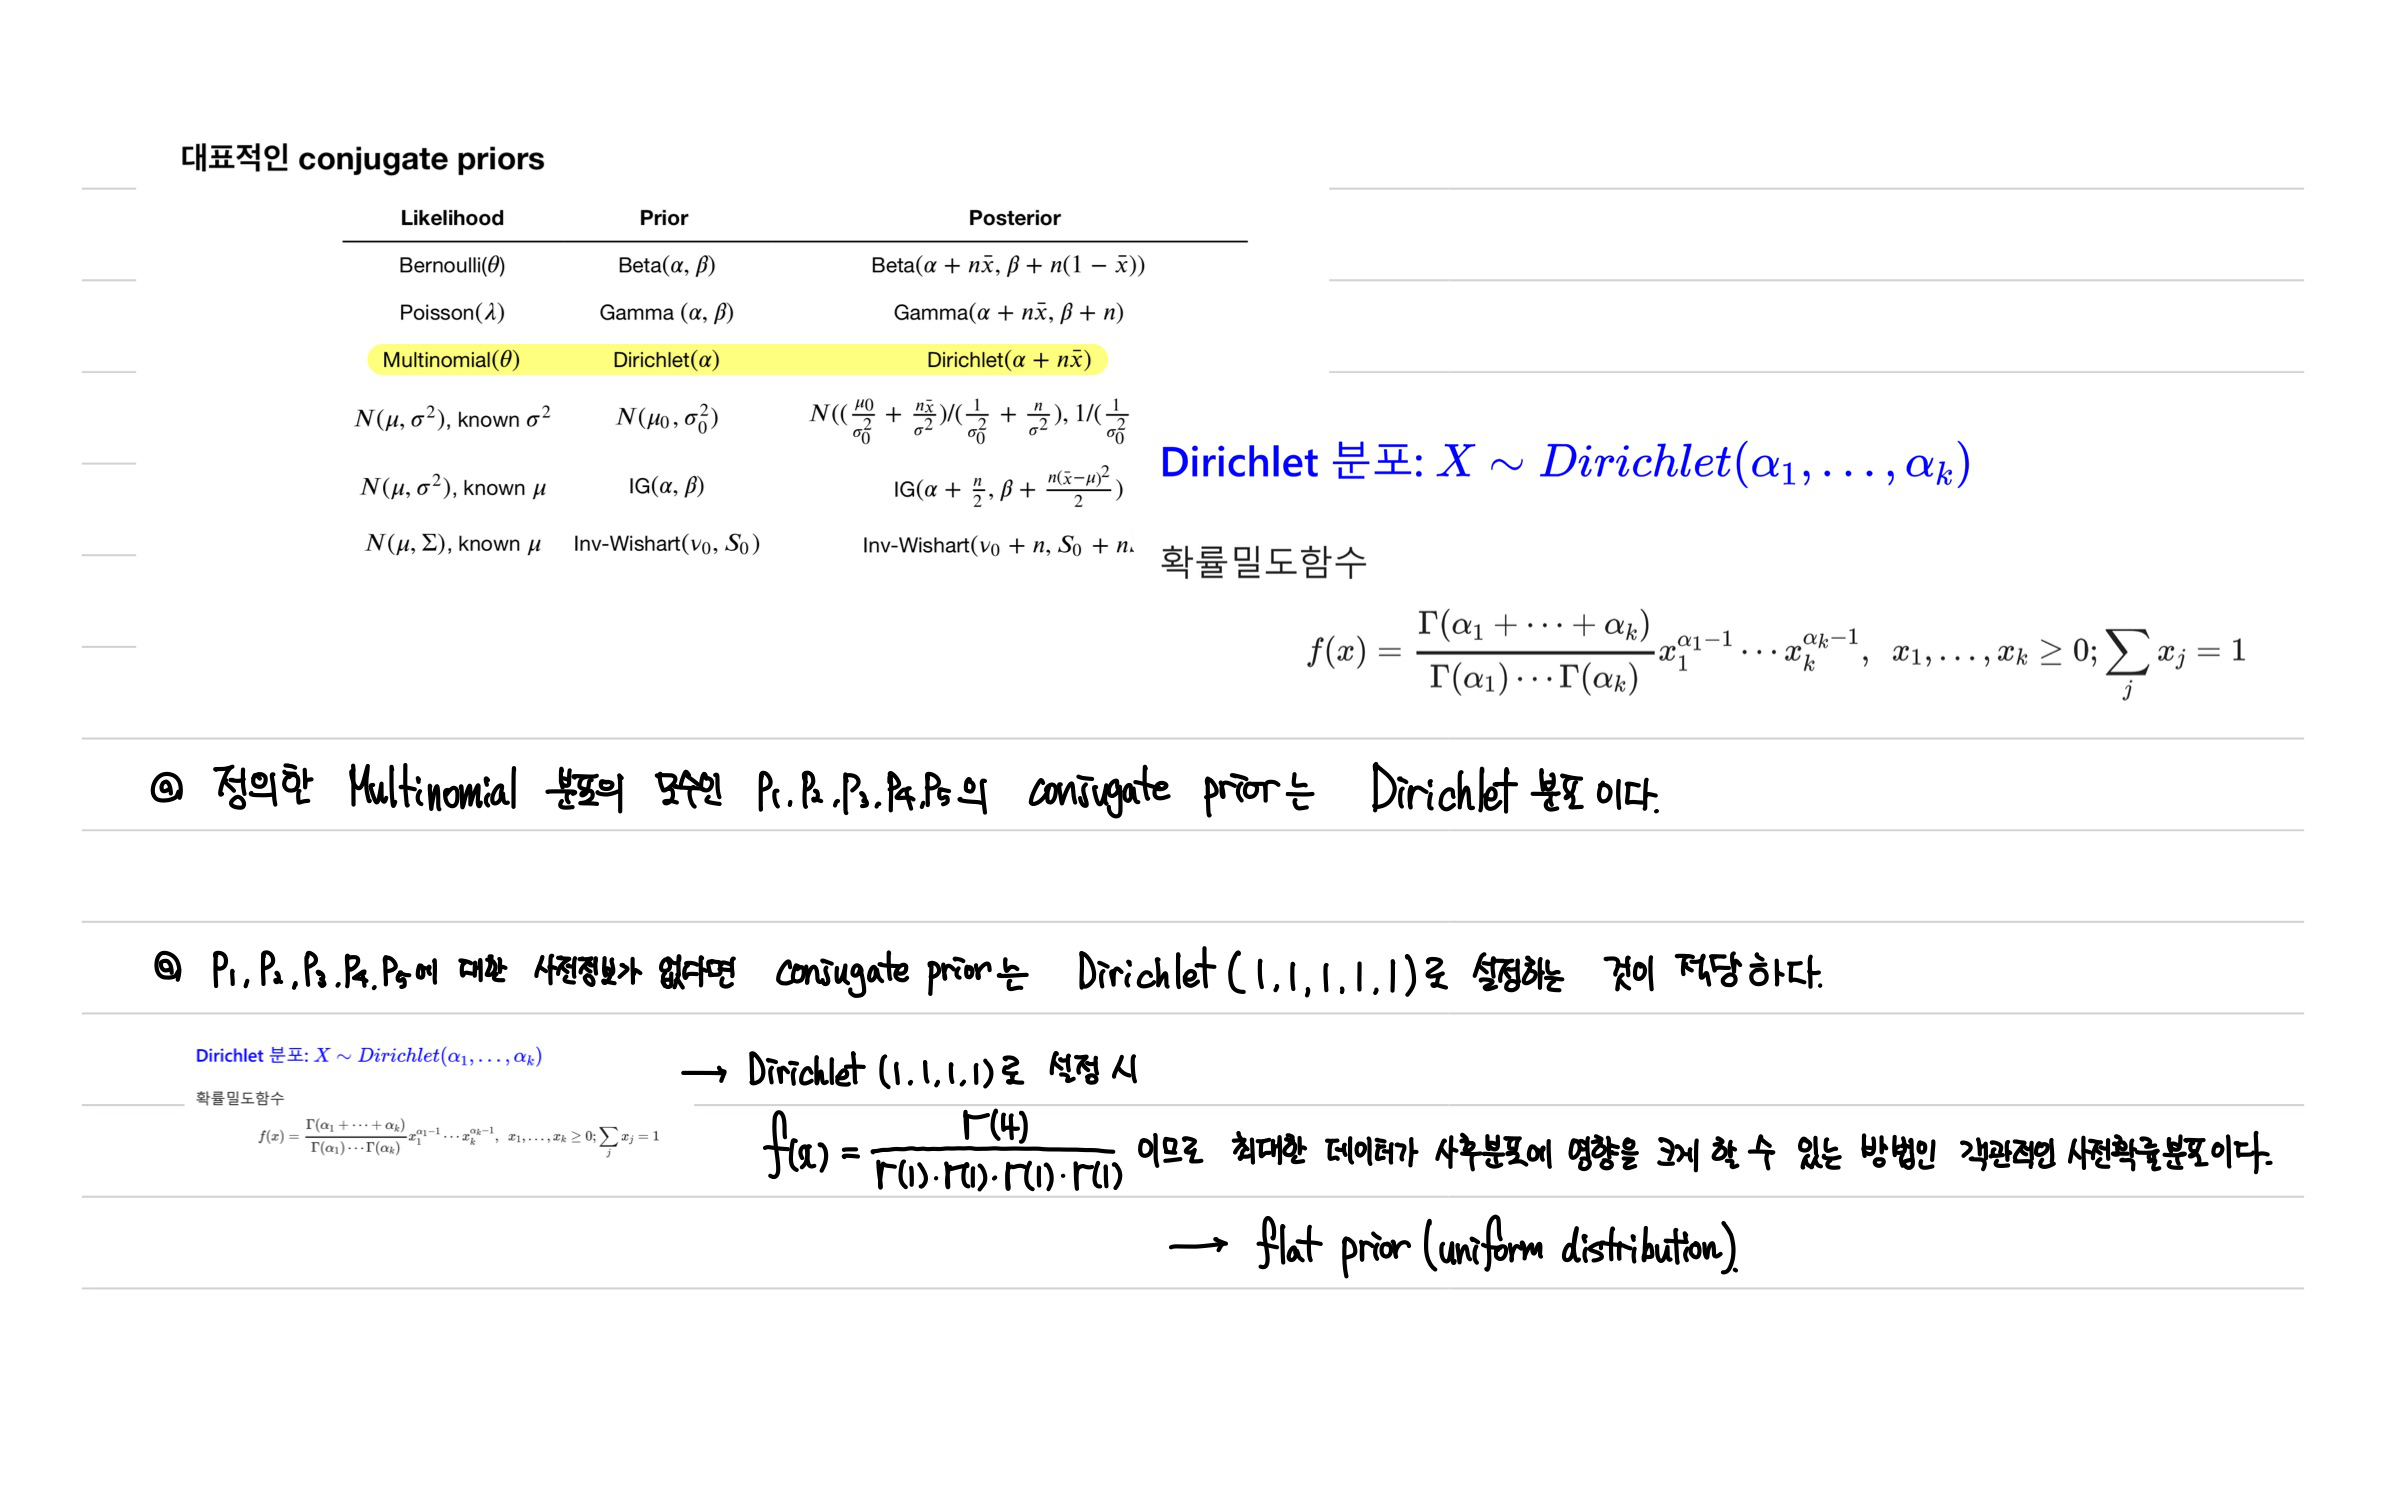

In [3]:
Image.open('Question2_1.jpg')

- Multinomial 분포의 모수인  𝑝1,𝑝2,…,𝑝5 의 conjugate prior는 Dirichlet 분포이다.

- 사전 정보가 없는 non-informative prior의 경우 uniform distribution을 주로 사용한다. 따라서 𝑝1,𝑝2,…,𝑝5 에 대한 사전정보가 전혀 없다면 conjugate prior의 hyperparameter를 Dirichlet(1,1,1,1,1)로 설정하는 것이 적당하다. 
- Beta(1, 1)과 같은 경우 uniform distribution을 따르는데 Dirichlet는 Beta 분포의 확장판이기 때문에 Dirichlet 분포의 hyperparameter인 alpha 값을 모두 1로 설정하는 것이 적당하다.

In [5]:
prior_parameters = np.array([1,1,1,1,1])

(2) [12 pts]  위의 (3)에서 답한 posterior 분포를 사용하여 디자인 A와 디자인 B에 대해 5000개의 posterior sample을 추출하는 코드를 **pymc3를 사용하여** 작성하시오. (sampling을 실제로 수행하지 않아도 좋음)

In [6]:
observations_A = np.array([x79_a, x69_a, x50_a, x33_a, x0_a])
observations_B = np.array([x79_b, x69_b, x50_b, x33_b, x0_b])

In [29]:
import pymc3 as pm
from numpy.random import multinomial
from numpy.random import dirichlet

with pm.Model() as model:
    a = pm.Dirichlet('a', prior_parameters + observations_A)
    b = pm.Dirichlet('b', prior_parameters + observations_B)
    
    trace = pm.sample(5000, random_seed=123)

<ipython-input-29-34e4b031e299>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p2, p1]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 44 seconds.


(3) [10 pts]  요금제 가입자의 비율이 높은 디자인이 꼭 기업 입장에서 최선은 아닐 수 있다. 대신 해당 디자인을 통해 발생되는 수입의 기대값(expected revenue)을 계산하여 비교하고자 한다. 두 디자인의 expected revenue를 posterior sample을 사용하여 계산하고 디자인 A의 expected revenue가 디자인 B의 expected revenue보다 클 확률을 계산하는 코드를 작성하시오.

In [21]:
prior_parameters = np.array([1,1,1,1,1])

In [22]:
observations_A = np.array([x79_a, x69_a, x50_a, x33_a, x0_a])
observations_B = np.array([x79_b, x69_b, x50_b, x33_b, x0_b])

In [23]:
np.random.seed(0)

posterior_samples_A = dirichlet(prior_parameters + observations_A, size=10000)
posterior_samples_B = dirichlet(prior_parameters + observations_B, size=10000)

In [24]:
def expected_revenue(P):
    return 79*P[:,0] + 69*P[:,1] + 50*P[:,2] + 33*P[:,3] + 0*P[:,4]

posterior_expected_revenue_A = expected_revenue(posterior_samples_A)
posterior_expected_revenue_B = expected_revenue(posterior_samples_B)

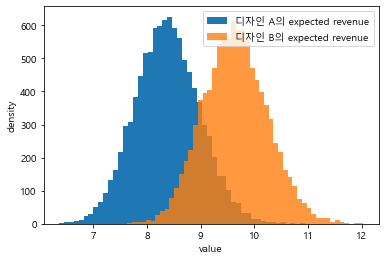

In [25]:
plt.hist(posterior_expected_revenue_A, histtype='stepfilled',
    label='디자인 A의 expected revenue', bins=50)
plt.hist(posterior_expected_revenue_B, histtype='stepfilled',
    label='디자인 B의 expected revenue', bins=50, alpha=0.8)
plt.xlabel('value')
plt.ylabel('density')
plt.legend();

In [26]:
p = (posterior_expected_revenue_A > posterior_expected_revenue_B).mean()
print ("디자인 A의 expected revenue가 디자인 B의 expected revenue보다 클 확률: %.4f"%p)

디자인 A의 expected revenue가 디자인 B의 expected revenue보다 클 확률: 0.0657


3\. 두 개의 웹사이트 디자인 A, B 중 어떤 디자인의 전환율이 높은지 테스트 하기 위해 Bayesian bandit(Thompson sampling) 방법을 사용하고자 한다. 각 디자인에 대한 사전확률분포는 $Beta(1,1)$로 동일하게 설정하였다. 10번의 시행 결과 아래의 표와 같은 결과를 얻었다. 


|   | A 디자인 | B 디자인 | 
|:-:|:-------:|:------:|
|총 시행 수| 7 | 3 | 
|전환 건수| 3|1|


Thompson Sampling의 알고리즘은 아래와 같다. 

1. 각 밴디트 $b$에 대해 사전확률분포 $\text{Beta}(\alpha_0, \beta_0)$ 에서 랜덤 표본 $X_b$를 추출한다.
2. 표본값이 가장 큰 밴디트를 선택한다. 즉, $B = \text{arg} \max{X_b}$를 고른다.
3. 밴디트 $B$결과를 관측하고, 밴디트$B$에 대한 사전확률을 업데이트한다.
    - 관측된 결과 $X$(win 또는 lose, 각각의 1과 0으로 대신한다)는 이항분포를 따르므로 사후확률은 $\text{Beta} (\alpha = \alpha_0+X, \beta = \beta_0 + 1 - X)$다.
4. 1로 돌아간다.

In [33]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt



rand = np.random.rand

class Bandits(object):
    """
    This class represents N bandits machines.

    parameters:
        p_array: a (n,) Numpy array of probabilities >0, <1.

    methods:
        pull( i ): return the results, 0 or 1, of pulling 
                   the ith bandit.
    """
    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)
        
    def pull(self, i):
        #i is which arm to pull
        return np.random.rand() < self.p[i]
    
    def __len__(self):
        return len(self.p)

    
class BayesianStrategy(object):
    """
    Implements a online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    parameters:
        bandits: a Bandit class with .pull method
    
    methods:
        sample_bandits(n): sample and train on n pulls.

    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """
    
    def __init__(self, bandits):
        
        self.bandits = bandits
        n_bandits = len(self.bandits)
        self.wins = np.zeros(n_bandits)
        self.trials = np.zeros(n_bandits)
        self.N = 0
        self.choices = []
        self.bb_score = []

    
    def sample_bandits(self, n=1):
        
        bb_score = np.zeros(n)
        choices = np.zeros(n)
        
        for k in range(n):

            #사전확률에서 샘플링하여 이길 확률이 가장 높은 밴디트 선택
            choice = np.argmax(np.random.beta(1 + self.wins, 1 + self.trials - self.wins))
            
            #선택된 밴디트에서 머신 당기기
            result = self.bandits.pull(choice)
            
            #사전확률과 스코어 업데이트
            self.wins[choice] += result
            self.trials[choice] += 1
            bb_score[k] = result 
            self.N += 1
            choices[k] = choice
            
        self.bb_score = np.r_[self.bb_score, bb_score]
        self.choices = np.r_[self.choices, choices]
        return 

In [34]:
hidden_prob = np.array([3/7, 1/3])
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)

In [35]:
bayesian_strat.sample_bandits(11)

In [36]:
bayesian_strat.choices

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

(a)  [12 pts] 11번째 시행에서 위의 알고리즘의 Step 1의 랜덤표본 $X_b$를 뽑는 확률분포를 각 디자인 A,B에 대해 명시하시오. 

- 각 벤디트가 이길 확률에 대한 사전분포를 Beta(1,1)로 가정하고 시작하며, 각각의 벤디트의 확률 값이 도출되게 된다. 그 후에 가장 큰 벤디트를 선택하여 가장 큰 벤디트의 결과를 관측한 뒤에 사전확률을 업데이트 한다. Beta(alpha+성공횟수, beat+실패횟수)로 업데이트 된다.

A 디자인의 경우는 Beta(1+3, 1+4) = Beta(4,5)  
B 디자인의 경우는 Beta(1+1, 1+2) = Beta(2,3)

(b) [10 pts]  위의 (a)에서 답한 각 확률분포의 평균을 계산하시오. 이를 비교했을 때 어느 디자인이 11번째 시행에서 테스트 대상으로 선택될 것이라 예상하는가? 

In [37]:
mean_a = 5/(5+4)
mean_b = 2/(2+3)
print(mean_a, mean_b)

0.5555555555555556 0.4


A디자인이 11번째 시행에서 테스트 대상으로 선택될 것이라 예상한다.

(c) [10 pts] | 11번째 시행에서 A 디자인이 선택되었고 관측 결과 전환이 발생되었다. 이 경우 12번째 시행에서 랜덤표본 $X_b$를 뽑는 확률분포를 A와 B 각 디자인에 대해 명시하시오. 

A 디자인의 경우는 Beta(1+3+1, 1+4) = Beta(5,5)  
B 디자인의 경우는 Beta(1+1, 1+2) = Beta(2,3)

In [38]:
mean_a_new = 5/(5+5)
mean_b_new = 2/(2+3)
print(mean_a_new, mean_b_new)

0.5 0.4
